In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test = pd.read_csv('processed_test.csv')
train = pd.read_csv('processed_train.csv')

In [4]:
shops = pd.read_csv('./competitive-data-science-predict-future-sales/shops.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30109380 entries, 0 to 30109379
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date_block_num    int64  
 1   shop_id           int64  
 2   item_id           int64  
 3   mean_price        float64
 4   item_cnt_month    float64
 5   item_category_id  int64  
 6   item_cnt_lag_1    float64
 7   item_cnt_lag_2    float64
 8   item_cnt_lag_3    float64
 9   item_cnt_lag_6    float64
 10  item_cnt_lag_12   float64
 11  rolling_mean      float64
dtypes: float64(8), int64(4)
memory usage: 2.7 GB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                214200 non-null  int64  
 1   shop_id           214200 non-null  int64  
 2   item_id           214200 non-null  int64  
 3   date_block_num    214200 non-null  int64  
 4   mean_price        214200 non-null  float64
 5   item_cnt_month    214200 non-null  float64
 6   item_category_id  198072 non-null  float64
 7   item_cnt_lag_1    214200 non-null  float64
 8   item_cnt_lag_2    214200 non-null  float64
 9   item_cnt_lag_3    214200 non-null  float64
 10  item_cnt_lag_6    214200 non-null  float64
 11  item_cnt_lag_12   214200 non-null  float64
 12  rolling_mean      214200 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 21.2 MB


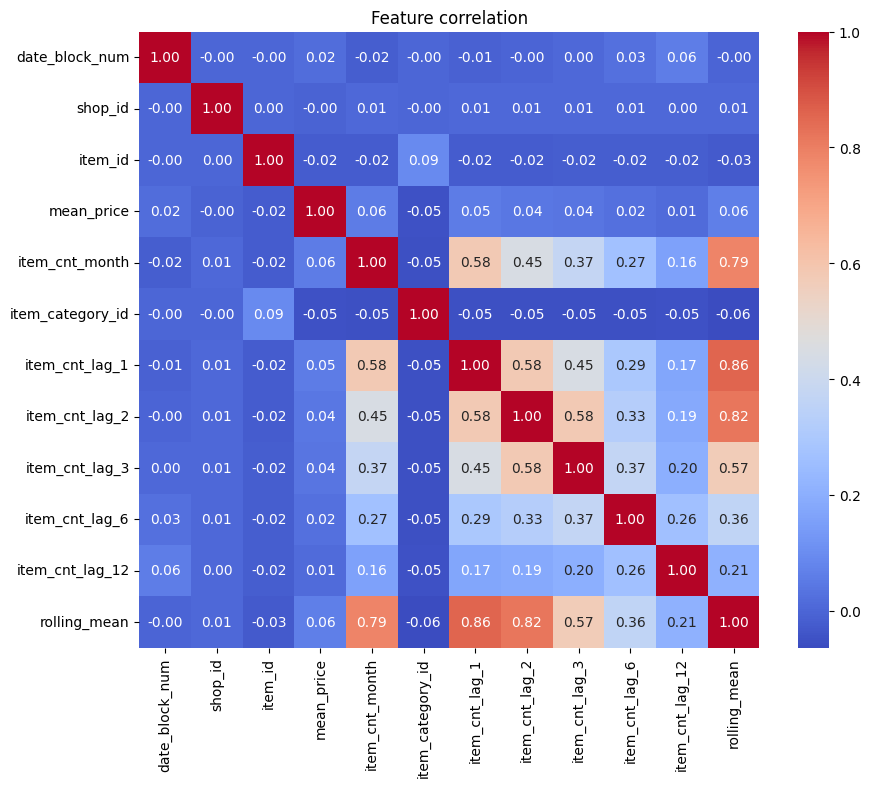

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature correlation")
plt.show()

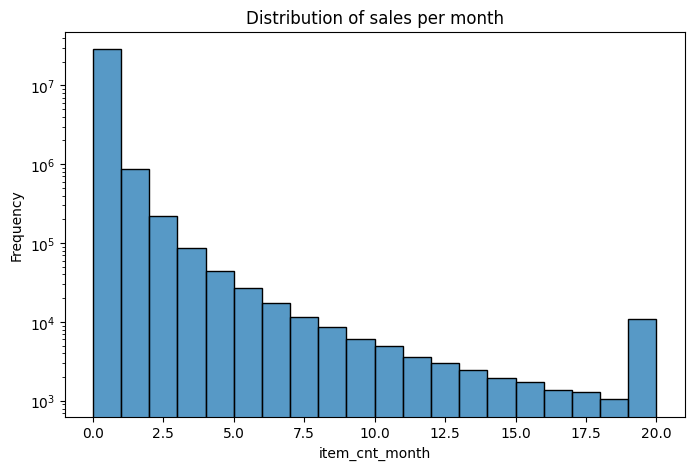

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(train['item_cnt_month'], bins=20, kde=False)
plt.title("Distribution of sales per month")
plt.xlabel("item_cnt_month")
plt.ylabel("Frequency")
plt.yscale('log')  
plt.show()

That peak at the end of the chart is due to all sales that were greater than 20 being cut off to 20.

In [9]:
train = train.merge(shops, on='shop_id', how='left')

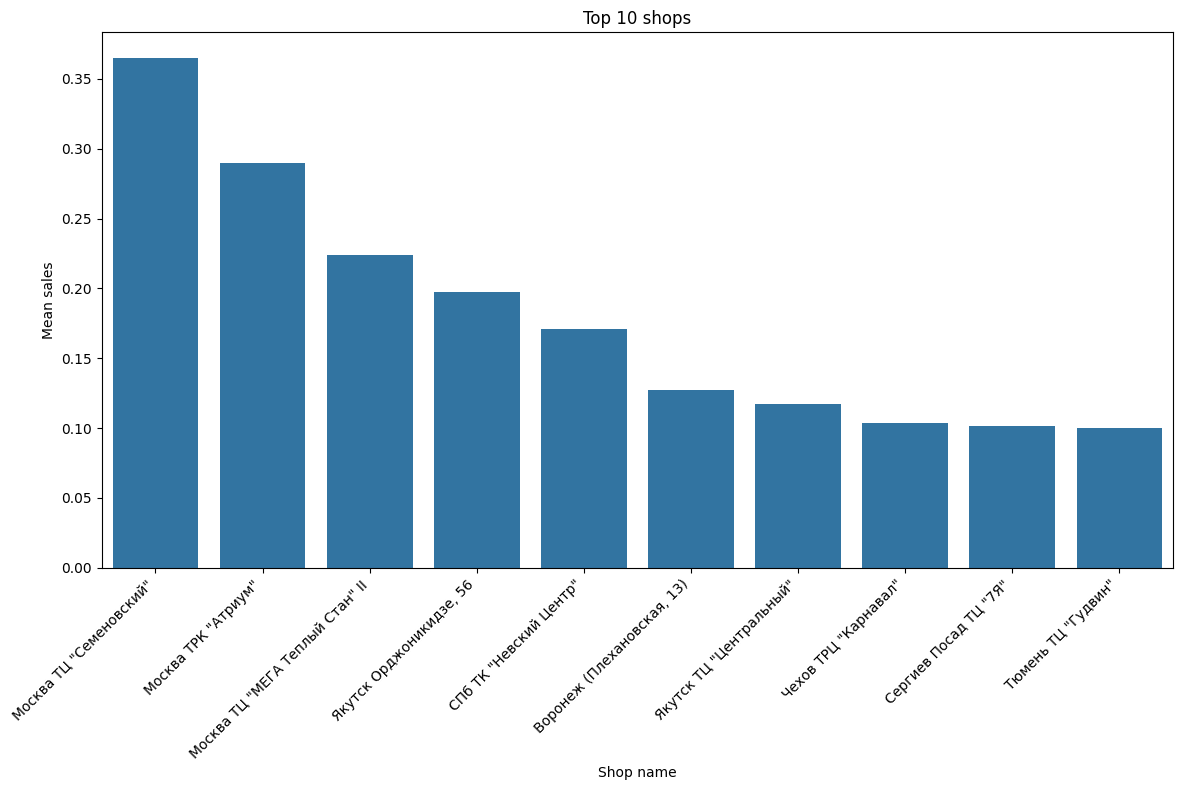

In [10]:
shop_sales = (
    train.groupby('shop_name')['item_cnt_month']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12,8))
sns.barplot(x='shop_name', y='item_cnt_month', data=shop_sales)
plt.title("Top 10 shops")
plt.xlabel("Shop name")
plt.ylabel("Mean sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

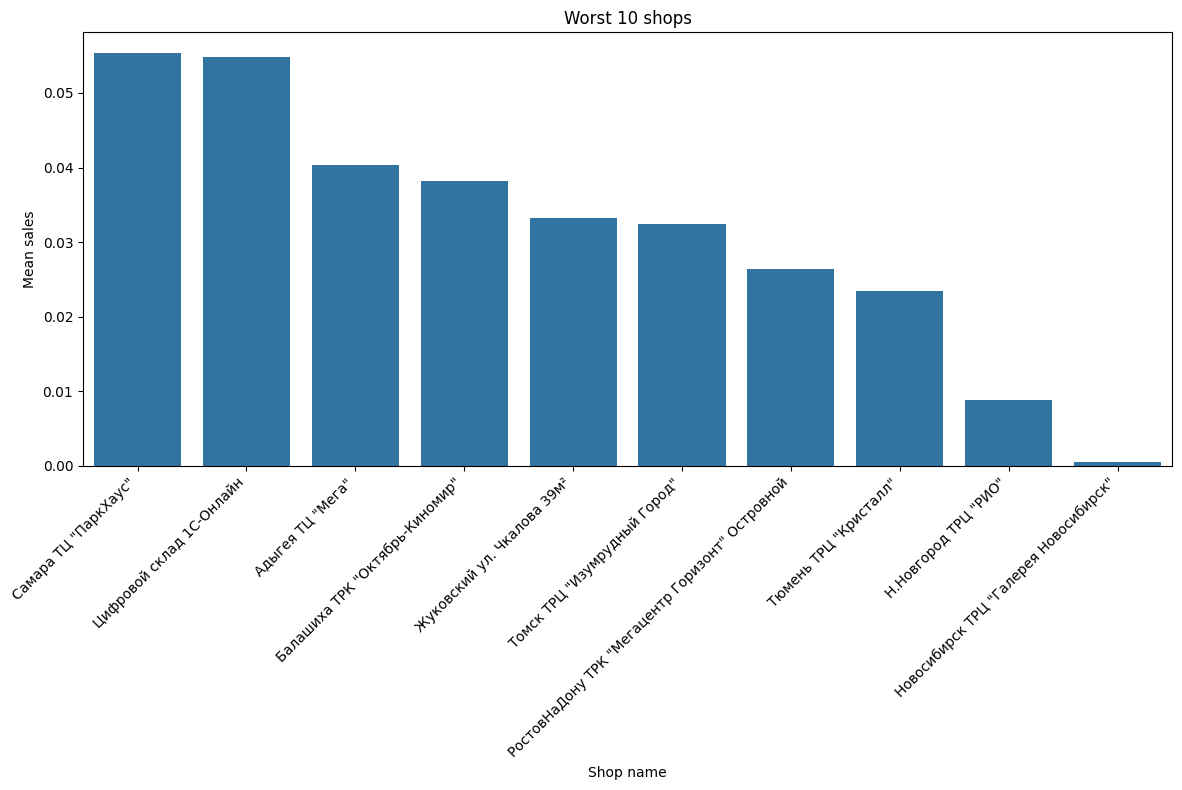

In [12]:
shop_sales = (
    train.groupby('shop_name')['item_cnt_month']
    .mean()
    .sort_values(ascending=False)
    .tail(10)
    .reset_index()
)

plt.figure(figsize=(12,8))
sns.barplot(x='shop_name', y='item_cnt_month', data=shop_sales)
plt.title("Worst 10 shops")
plt.xlabel("Shop name")
plt.ylabel("Mean sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()